# Import File and Libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import datetime as dt

In [68]:
# Read file in as Pandas dataframe

df = pd.read_csv('kc2_house_data.csv')
df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,lat,long
0,221900.0,3,1.00,1.0,0.0,0.0,3,7,98178,47.5112,-122.257
1,538000.0,3,2.25,2.0,0.0,0.0,3,7,98125,47.7210,-122.319
2,180000.0,2,1.00,1.0,0.0,0.0,3,6,98028,47.7379,-122.233
3,604000.0,4,3.00,1.0,0.0,0.0,5,7,98136,47.5208,-122.393
4,510000.0,3,2.00,1.0,0.0,0.0,3,8,98074,47.6168,-122.045


# Feature Engineering

## Engineering Distance From City Using Haversine Package

In [69]:
# Import haversine package and define city centers with their grid coordinates 

from haversine import haversine

seattle = [47.6092, -122.3363]
bellevue = [47.61555, -122.20392]

In [70]:
# Check haversine functionality

haversine(seattle, bellevue, unit ='mi')

6.181695095872431

In [71]:
# Zip lat and long columns into single column 

df['lat_long'] = tuple(zip(df.lat, df.long))

In [72]:
# Initialize lists to store values and calculate distances from entry locations to city 
# centers. 

seattle_distances = []
for i in df['lat_long']:
    seattle_distances.append(haversine((seattle), (i), unit = 'mi'))
df['distance_from_seattle'] = pd.Series(seattle_distances)

bellevue_distances = []
for i in df['lat_long']:
    bellevue_distances.append(haversine((bellevue), (i), unit = 'mi'))
df['distance_from_bellevue'] = pd.Series(bellevue_distances)

In [73]:
# Define distance from city as minimum distance between entry and city centers

df['distance_from_city'] = df[['distance_from_bellevue', 'distance_from_seattle']].min(axis = 1)

In [74]:
df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,lat,long,lat_long,distance_from_seattle,distance_from_bellevue,distance_from_city
0,221900.0,3,1.00,1.0,0.0,0.0,3,7,98178,47.5112,-122.257,"(47.5112, -122.257)",7.714868,7.622786,7.622786
1,538000.0,3,2.25,2.0,0.0,0.0,3,7,98125,47.7210,-122.319,"(47.721, -122.319)",7.766476,9.041882,7.766476
2,180000.0,2,1.00,1.0,0.0,0.0,3,6,98028,47.7379,-122.233,"(47.7379, -122.233)",10.107949,8.561145,8.561145
3,604000.0,4,3.00,1.0,0.0,0.0,5,7,98136,47.5208,-122.393,"(47.5208, -122.393)",6.655340,10.979730,6.655340
4,510000.0,3,2.00,1.0,0.0,0.0,3,8,98074,47.6168,-122.045,"(47.6168, -122.045)",13.578402,7.402273,7.402273


In [33]:
# Check correlation between new features

df.corr()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,lat,long,distance_from_seattle,distance_from_bellevue,distance_from_city
price,1.000000,0.295002,0.440383,0.269649,0.051758,0.212854,0.033773,0.617187,-0.019340,0.440666,0.077909,-0.308105,-0.462268,-0.446858
bedrooms,0.295002,1.000000,0.499579,0.157417,-0.027228,0.030072,0.022416,0.324654,-0.156999,-0.037443,0.148410,0.106492,-0.003908,0.051834
bathrooms,0.440383,0.499579,1.000000,0.503857,-0.006279,0.080238,-0.139242,0.607079,-0.213923,-0.016961,0.252734,0.158219,0.023240,0.070323
floors,0.269649,0.157417,0.503857,1.000000,-0.006620,-0.018157,-0.278307,0.457266,-0.066959,0.032990,0.137131,0.031492,-0.006922,-0.011963
waterfront,0.051758,-0.027228,-0.006279,-0.006620,1.000000,0.282322,0.011945,-0.013068,0.043190,-0.041664,-0.055338,0.008404,0.034698,0.021958
view,0.212854,0.030072,0.080238,-0.018157,0.282322,1.000000,0.031027,0.114963,0.101755,-0.032690,-0.077037,-0.029396,0.021162,-0.007458
condition,0.033773,0.022416,-0.139242,-0.278307,0.011945,0.031027,1.000000,-0.174045,-0.007430,-0.019545,-0.097531,-0.061346,-0.036978,-0.041573
grade,0.617187,0.324654,0.607079,0.457266,-0.013068,0.114963,-0.174045,1.000000,-0.189240,0.077401,0.233844,0.089059,-0.068899,-0.023609
zipcode,-0.019340,-0.156999,-0.213923,-0.066959,0.043190,0.101755,-0.007430,-0.189240,1.000000,0.278267,-0.562644,-0.551672,-0.256430,-0.388560
lat,0.440666,-0.037443,-0.016961,0.032990,-0.041664,-0.032690,-0.019545,0.077401,0.278267,1.000000,-0.132482,-0.609713,-0.716062,-0.703749


In [75]:
# Drop columns that are now highly correlated with engineered feature

df.drop(['lat', 'long', 'lat_long', 'distance_from_seattle', 'distance_from_bellevue'], axis = 1, inplace = True)

In [76]:
df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,distance_from_city
0,221900.0,3,1.00,1.0,0.0,0.0,3,7,98178,7.622786
1,538000.0,3,2.25,2.0,0.0,0.0,3,7,98125,7.766476
2,180000.0,2,1.00,1.0,0.0,0.0,3,6,98028,8.561145
3,604000.0,4,3.00,1.0,0.0,0.0,5,7,98136,6.655340
4,510000.0,3,2.00,1.0,0.0,0.0,3,8,98074,7.402273


In [77]:
df.isnull().sum()

price                 0
bedrooms              0
bathrooms             0
floors                0
waterfront            0
view                  0
condition             0
grade                 0
zipcode               0
distance_from_city    0
dtype: int64

## Bin Zip Codes into School Districts

In [78]:
df['zipcode'].nunique()

70

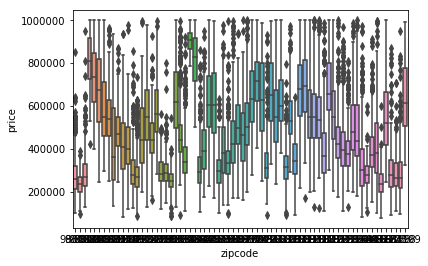

In [59]:
sns.boxplot(x = df['zipcode'], y = df['price'])

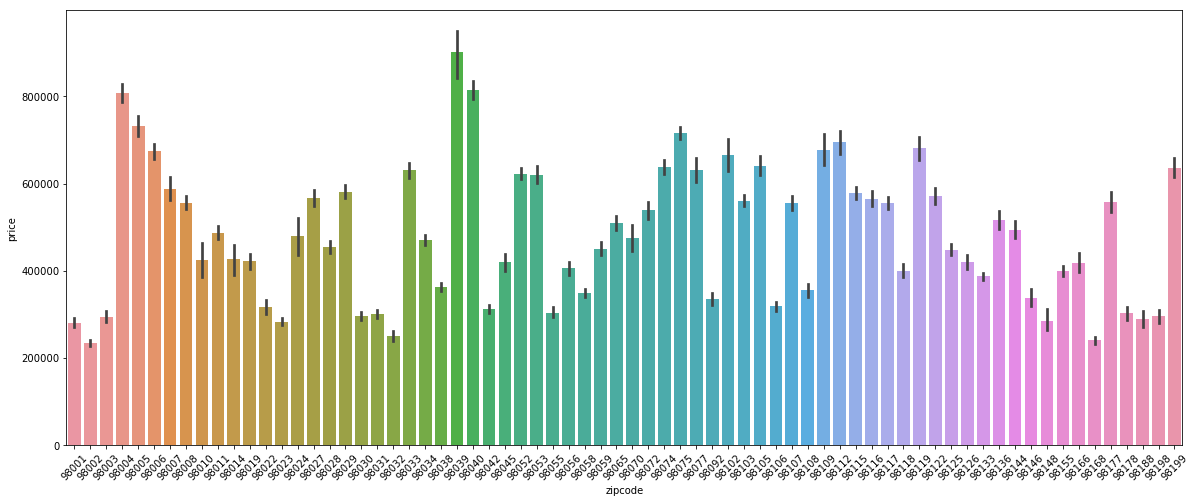

In [39]:
# Examine relationship between zipcode and price using barplot

plt.figure(figsize=(20,8))
zc = sns.barplot(x = 'zipcode', y ='price', data = df)
for item in zc.get_xticklabels():
    item.set_rotation(45)

In [79]:
# Bin zipcodes into school districts using King County school district map

def group_zips(z):
    if z in [98177, 98133, 98125, 98155]:
        return 'Shoreline'
    
    elif z in [98028, 98011, 98072, 98077]:
        return 'Northshore'
    
    elif z in [98019, 98014]:
        return 'Riverview'
    
    elif z in [98117, 98103, 98115, 98107, 98105, 98199, 98119, 98109, 98102, 
               98112, 98122, 98116, 98136, 98126,
               98106, 98144, 98108, 98118]:
        return 'Seattle'
    
    elif z in [98040]:
        return 'MercerIsland'
    
    elif z in [98034, 98052, 98053, 98033, 98074]:
        return 'LakeWashington'
    
    elif z in [98039, 98004, 98005, 98007, 98008, 98006]:
        return 'Bellevue'
    
    elif z in [98059, 98027, 98075, 98029]:
        return 'Issaquah'
    
    elif z in [98024, 98065, 98045]:
        return 'SnoqualmieValley'
    
    elif z in [98168]:
        return 'Tukwila'
    
    elif z in [98178, 98056, 98055]:
        return 'Renton'
    
    elif z in [98070]:
        return 'VashonIsland'
    
    elif z in [98146, 98166, 98148, 98188]:
        return 'Highline'
    
    elif z in [98198, 98023, 98003, 98001]:
        return 'FederalWay'
    
    elif z in [98032, 98031, 98030, 98042, 98058]:
        return 'Kent'
    
    elif z in [98002, 98092]:
        return 'Auburn'
    
    elif z in [98038]:
        return 'Tahoma'
    
    elif z in [98022, 98010]:
        return 'Enumclaw'

In [80]:
df['zipcode'] = df['zipcode'].map(group_zips)

In [81]:
df['zipcode'].head()

0            Renton
1         Shoreline
2        Northshore
3           Seattle
4    LakeWashington
Name: zipcode, dtype: object

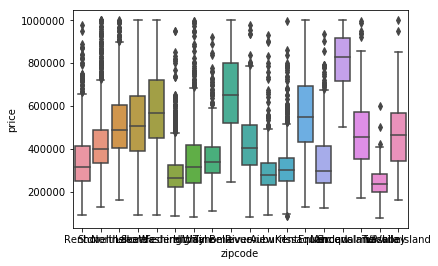

In [82]:
# Examine school district relationship with price for linearity

sns.boxplot(x = 'zipcode', y = 'price', data = df)

## One Hot Encode Categorical Variables

In [83]:
# One hot encode zip code engineered feature for use in regression model

from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
ohe = ohc.fit_transform(df.zipcode.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(ohe, columns = ['SD_' + str(ohc.categories_[0][i]) for i in range(len(ohc.categories_[0]))])
dfh = pd.concat([df, dfOneHot], axis = 1)
dfh.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,distance_from_city,...,SD_MercerIsland,SD_Northshore,SD_Renton,SD_Riverview,SD_Seattle,SD_Shoreline,SD_SnoqualmieValley,SD_Tahoma,SD_Tukwila,SD_VashonIsland
0,221900.0,3,1.00,1.0,0.0,0.0,3,7,Renton,7.622786,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,538000.0,3,2.25,2.0,0.0,0.0,3,7,Shoreline,7.766476,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,180000.0,2,1.00,1.0,0.0,0.0,3,6,Northshore,8.561145,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,4,3.00,1.0,0.0,0.0,5,7,Seattle,6.655340,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,3,2.00,1.0,0.0,0.0,3,8,LakeWashington,7.402273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
# Drop original zipcode column to prevent multicollinearity with new engineered column 

dfh.drop(['zipcode'], axis = 1, inplace = True)

In [85]:
# Save file to continue work in another notebook

dfh.to_csv('kc3_house_data.csv', index = False)